## Рубежный контроль №1.
### ИУ5-22М Халимонов А.М. Вариант 17.
#### Задание №17
Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием преобразования Йео-Джонсона (Yeo-Johnson transformation).  
#### Задание №37
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectPercentile для 5% лучших признаков, и метод, основанный на взаимной информации.
#### Для студентов группы ИУ5-22М
Для произвольной колонки данных построить гистограмму

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.feature_selection import SelectPercentile, mutual_info_classif

In [39]:
data = pd.read_csv('../dataset.csv', sep=',', decimal=',')
data = data.dropna()
dt = data.rename(columns={
    "Area (sq. mi.)": "Area",
    "Pop. Density (per sq. mi.)" : "Density",
    "Coastline (coast/area ratio)": "Coastline",
    "Infant mortality (per 1000 births)": "Infant mortality",
    "GDP ($ per capita)": "GDP",
    "Literacy (%)": "Literacy",
    "Phones (per 1000)": "Phones",
    "Arable (%)": "Arable",
    "Crops (%)": "Crops",
    "Other (%)": "Other",
})

In [40]:
dt.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Density             float64
Coastline           float64
Net migration       float64
Infant mortality    float64
GDP                 float64
Literacy            float64
Phones              float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

### Нормализация числового признака преобразованием Йео-Джонсона + построение гистограммы
Столбец до преобразования

(array([171.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([1.8000000e+00, 6.4904800e+02, 1.2962960e+03, 1.9435440e+03,
        2.5907920e+03, 3.2380400e+03, 3.8852880e+03, 4.5325360e+03,
        5.1797840e+03, 5.8270320e+03, 6.4742800e+03, 7.1215280e+03,
        7.7687760e+03, 8.4160240e+03, 9.0632720e+03, 9.7105200e+03,
        1.0357768e+04, 1.1005016e+04, 1.1652264e+04, 1.2299512e+04,
        1.2946760e+04, 1.3594008e+04, 1.4241256e+04, 1.4888504e+04,
        1.5535752e+04, 1.6183000e+04]),
 <BarContainer object of 25 artists>)

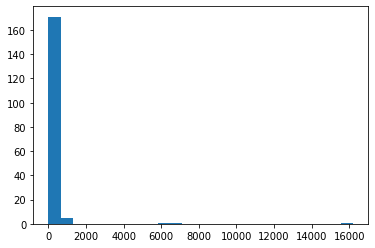

In [41]:
col_to_normalize = 'Density'
plt.hist(dt[col_to_normalize], bins=25)

После преобразования

(array([ 4.,  5.,  2.,  3.,  4., 10.,  9., 11.,  9., 15., 21., 19., 17.,
        13., 13., 13.,  2.,  2.,  4.,  0.,  0.,  0.,  2.,  0.,  1.]),
 array([1.00072809, 1.26046912, 1.52021015, 1.77995118, 2.03969221,
        2.29943325, 2.55917428, 2.81891531, 3.07865634, 3.33839737,
        3.59813841, 3.85787944, 4.11762047, 4.3773615 , 4.63710253,
        4.89684357, 5.1565846 , 5.41632563, 5.67606666, 5.93580769,
        6.19554873, 6.45528976, 6.71503079, 6.97477182, 7.23451285,
        7.49425388]),
 <BarContainer object of 25 artists>)

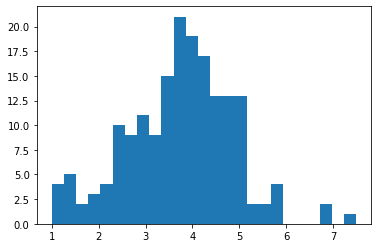

In [42]:
normalized_col, params = stats.yeojohnson(dt[col_to_normalize]) 
plt.hist(normalized_col, bins=25)

### Отбор 5% признаков с помощью класса SelectPercentile и метода основанного на взаимной информации

In [48]:
y = dt['Region']
x = dt[dt.columns.difference(['Region', 'Country'])]
print(x.shape, y.shape)

(179, 18) (179,)


Отберём 5% лучших призноков, отобранных с помощью метода mutual_info_classif для задачи классификации

In [59]:
sel_mi = SelectPercentile(mutual_info_classif, percentile=5).fit(x, y)

list(zip(x.columns, sel_mi.get_support(), sel_mi.scores_))

[('Agriculture', False, 0.3872588200294662),
 ('Arable', False, 0.0581045416201893),
 ('Area', False, 0.1452879259501465),
 ('Birthrate', False, 0.5020164544179244),
 ('Climate', False, 0.5116095279061219),
 ('Coastline', False, 0.14123431384327922),
 ('Crops', False, 0.1715009824940381),
 ('Deathrate', True, 0.6004850667254602),
 ('Density', False, 0.12802528491165877),
 ('GDP', False, 0.5473226827591451),
 ('Industry', False, 0.10941572986152304),
 ('Infant mortality', False, 0.5673584630185591),
 ('Literacy', False, 0.5792377851447008),
 ('Net migration', False, 0.4210646044865216),
 ('Other', False, 0.06750685868500872),
 ('Phones', False, 0.5675812441645043),
 ('Population', False, 0.18711262185393363),
 ('Service', False, 0.24369352747766904)]